In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
!ls "/content/drive/My Drive/basic_data_files.csv"

'/content/drive/My Drive/basic_data_files.csv'


In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df = pd.read_csv("/content/drive/My Drive/basic_data_files.csv", 
                 usecols=['YEAR','TRI_FACILITY_ID','FACILITY_NAME','ZIP','LATITUDE','LONGITUDE','PRIMARY_NAICS','INDUSTRY_SECTOR','CLASSIFICATION','CARCINOGEN','5.1_FUGITIVE_AIR','5.2_STACK_AIR','5.3_WATER','5.5.1_LANDFILLS','8.4_RECYCLING_ON-SITE','8.6_TREATMENT_ON-SITE'])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,3,8,11,12,15,22,36,39,40,41,45,99,101) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [55]:
df.head(6)

,YEAR,TRI_FACILITY_ID,FACILITY_NAME,ZIP,LATITUDE,LONGITUDE,INDUSTRY_SECTOR,PRIMARY_NAICS,CLASSIFICATION,CARCINOGEN,5.1_FUGITIVE_AIR,5.2_STACK_AIR,5.3_WATER,5.5.1_LANDFILLS,8.4_RECYCLING_ON-SITE,8.6_TREATMENT_ON-SITE
0,2016,46552DCTLT30350,EDCOAT LLC,46552,41.6934,-86.4552,Fabricated Metals,332812,TRI,NO,0,0,0,0,0,0
1,2016,01950NNSPC3MALC,UNION SPECIALTIES INC,1950,42.7964,-70.8904,Chemicals,325510,TRI,NO,1,17,0,0,0,0
2,2016,44691CRGLL1203T,CARGILL ANIMAL NUTRITION,44691,40.7847,-81.9396,Food,311119,TRI,NO,0,0,0,0,0,0
3,2016,02745CSHNT215DU,ACUSHNET CO BALL PLANT III,2745,41.7254,-70.9552,Miscellaneous Manufacturing,339920,TRI,NO,0,0,0,0,0,0
4,2016,30050CLRXC17LAK,CLOROX PRODUCTS MANUFACTURING CO,30297,33.6272,-84.3868,Chemicals,325611,TRI,NO,5,5,0,0,0,0
5,2016,78114WTCTN5877F,WATCO TANKS INC,78114,29.2561,-98.0917,Fabricated Metals,332312,TRI,YES,0,5488,0,0,0,0


In [56]:
df.describe()

,YEAR,TRI_FACILITY_ID,FACILITY_NAME,ZIP,LATITUDE,LONGITUDE,INDUSTRY_SECTOR,PRIMARY_NAICS,CLASSIFICATION,CARCINOGEN,5.1_FUGITIVE_AIR,5.2_STACK_AIR,5.3_WATER,5.5.1_LANDFILLS,8.4_RECYCLING_ON-SITE,8.6_TREATMENT_ON-SITE
count,5051323,5051323,5051323,5051323,2.550355e+06,5.048534e+06,5051271,2556963.0,5051323,5051323,5051323,5051323.0,5051323.0,5051323,5051322.0,5051322.0
unique,136693,51028,141808,29885,8.353900e+04,1.806910e+05,92,1712.0,7,14,91564,200519.0,177346.0,2387,110531.0,251145.0
top,2012,2001,BASF CORP,TX,4.063162e+01,-8.054632e+01,Chemicals,221112.0,TRI,NO,Pounds,0.0,0.0,0,0.0,0.0
freq,163848,90112,9487,221249,4.008000e+03,4.008000e+03,611573,123986.0,2194311,1972838,2482814,2093804.0,2993530.0,4562265,4165932.0,3689953.0


In [57]:
df.dtypes

YEAR                     object
TRI_FACILITY_ID          object
FACILITY_NAME            object
ZIP                      object
LATITUDE                 object
LONGITUDE                object
INDUSTRY_SECTOR          object
PRIMARY_NAICS            object
CLASSIFICATION           object
CARCINOGEN               object
5.1_FUGITIVE_AIR         object
5.2_STACK_AIR            object
5.3_WATER                object
5.5.1_LANDFILLS          object
8.4_RECYCLING_ON-SITE    object
8.6_TREATMENT_ON-SITE    object
dtype: object

In [58]:
df['YEAR'][2548770]

'Unnamed: 0'

In [59]:
df['YEAR'][160854]

'YEAR'

In [60]:
df.loc[df['YEAR']=='YEAR'] = 0
df.loc[df['YEAR']=='Unnamed: 0'] = 0

In [62]:
#pd.to_numeric(df['YEAR'])
df.YEAR = df.YEAR.astype(int)

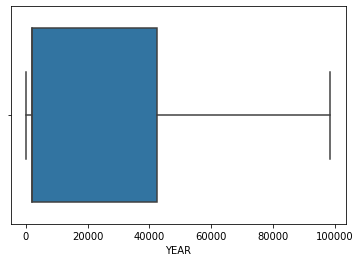

In [63]:
sns.boxplot(x=df['YEAR'])

In [64]:
df.shape

(5051323, 16)

In [65]:
df.drop(df[df['YEAR'] < 1960].index, inplace = True)

In [66]:
df.drop(df[df['YEAR'] > 2021].index, inplace = True)

In [67]:
df.shape

(2550429, 16)

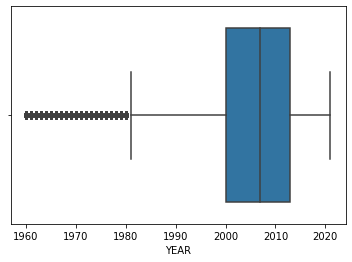

In [68]:
sns.boxplot(x=df['YEAR'])

In [70]:
df.drop(df[df['YEAR'] < 2000].index, inplace = True)

In [71]:
df.shape

(1981765, 16)

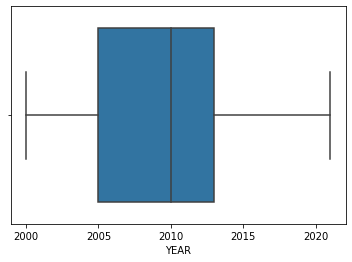

In [72]:
sns.boxplot(x=df['YEAR'])

In [75]:
df.drop(df[df['YEAR'] < 2011].index, inplace = True)

In [76]:
df.shape

(984170, 16)

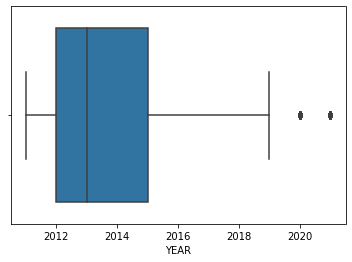

In [77]:
sns.boxplot(x=df['YEAR'])

In [78]:
df.loc[df['TRI_FACILITY_ID'] == '46552DCTLT30350'] = 0

In [79]:
df.TRI_FACILITY_ID = df.TRI_FACILITY_ID.astype(int)
#df['TRI_FACILITY_ID'] = pd.to_numeric(df['TRI_FACILITY_ID'])

ValueError: ignored

In [ ]:
pv = pd.pivot_table(df, index=df.YEAR, columns=df.YEAR,
                    values='TRI_FACILITY_ID', aggfunc='sum')

pv.plot()